<a href="https://colab.research.google.com/github/Voyageran/StartNN/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0,"/content/content/notebooks/colabInstallPackage")

!cp -av '/content/gdrive/MyDrive/Colab Notebooks/d2l' '/content/'

Mounted at /content/gdrive
'/content/gdrive/MyDrive/Colab Notebooks/d2l' -> '/content/d2l'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/paddle.py' -> '/content/d2l/paddle.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/mxnet.py' -> '/content/d2l/mxnet.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/tensorflow.py' -> '/content/d2l/tensorflow.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/torch.py' -> '/content/d2l/torch.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__init__.py' -> '/content/d2l/__init__.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__' -> '/content/d2l/__pycache__'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/mxnet.cpython-310.pyc' -> '/content/d2l/__pycache__/mxnet.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/__init__.cpython-310.pyc' -> '/content/d2l/__pycache__/__init__.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/torch.cpython-310.pyc' -> '/content/d2l/__pycache__/torch.cpython-

# **Perceptron**

Input: $\mathbf{x}$, weight $\mathbf{w}$, bias $b$,

Output:
$$
o = \sigma (<\mathbf{w}, \mathbf{x}> + b)
$$

$\sigma (x)$的例子：
$$
 \sigma (x) =
\begin{cases}
  1 & \text{if } x > 0 \\
  0/-1 & \text{ otherwise }
\end{cases}
$$

**Initialize** $w=0, b=0$

**repeat**

  **if** $y_i[<w,x_i>+b] \leq 0$ **then** \\
    $\quad w= w+y_i x_i$ \\
    $\quad b = b+y_i$

  **end if**

**until** all classified correctly



i.e.,
batch_size = 1;

loss function
$$
l(y, \mathbf{x}, \mathbf{w}) = max(0, -y<\mathbf{w}, \mathbf{x}>)
$$

- 如果label 错了，则max里右边会>0，就进行梯度下降优化
- 反之，比0小，就不需要优化了

SVM是感知机的一种。

不能拟合平面上XOR问题

## **Multilayer Perceptron**

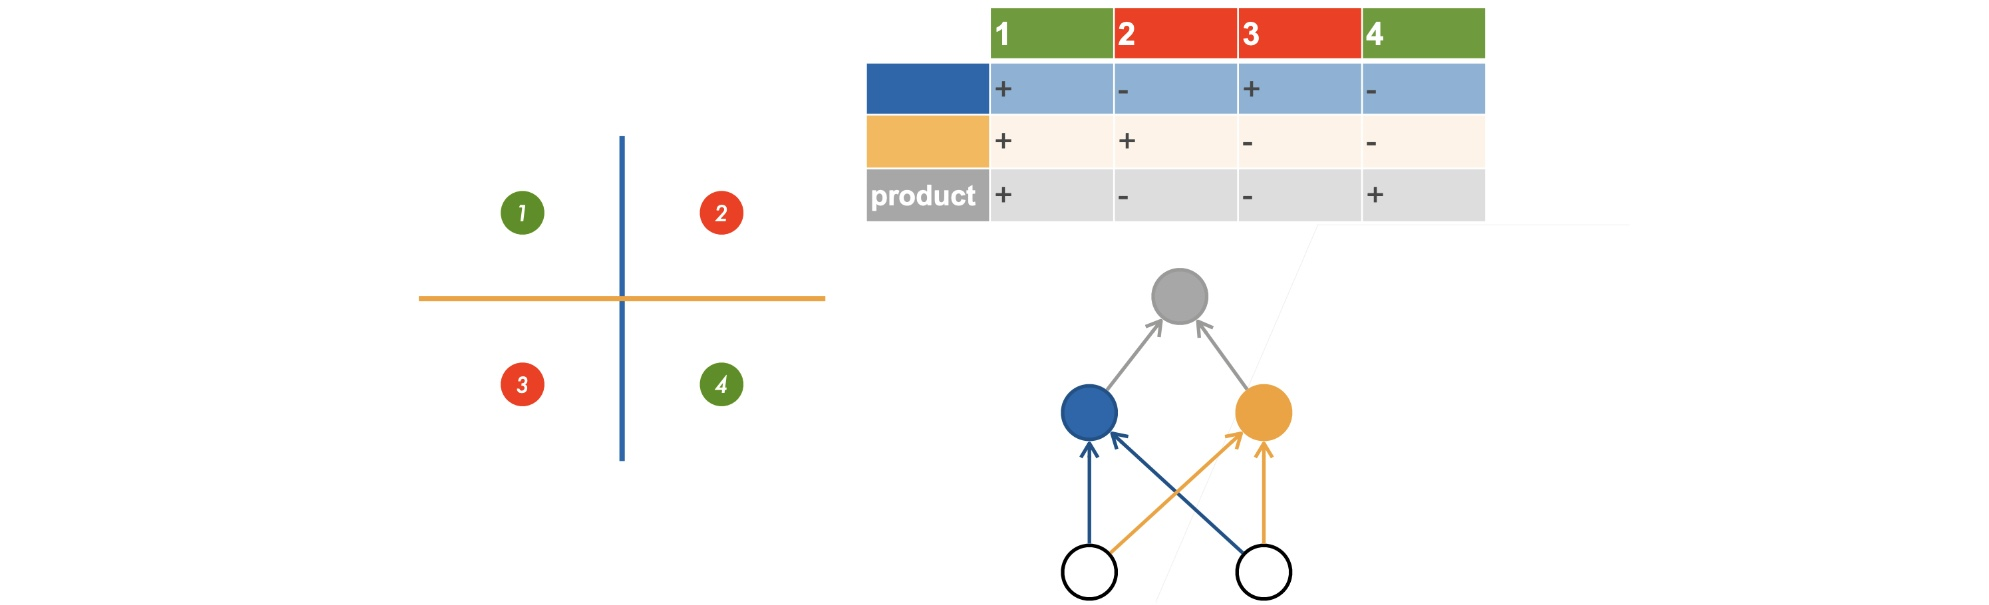

做两次，再组合。多层的idea就这么出来了。

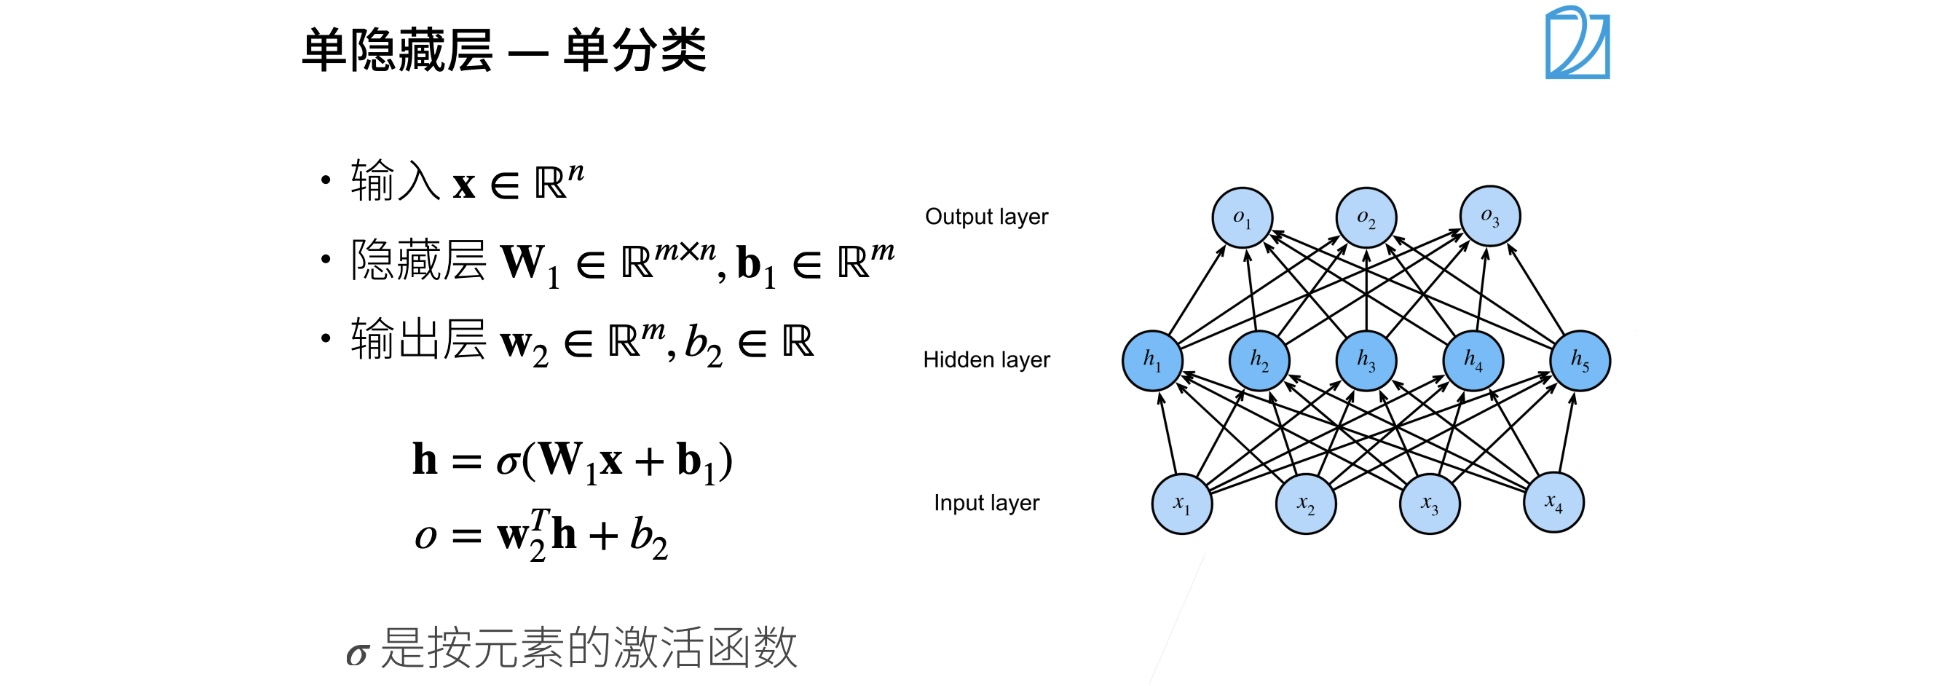

单分类输出右边这张图的output layer 应该只有一个圈，这里画得不对，目前懒得打公式，先放着。

如果隐藏层不加激活函数，那么线性组合多少次线性的都还是线性的，组合起来没用。

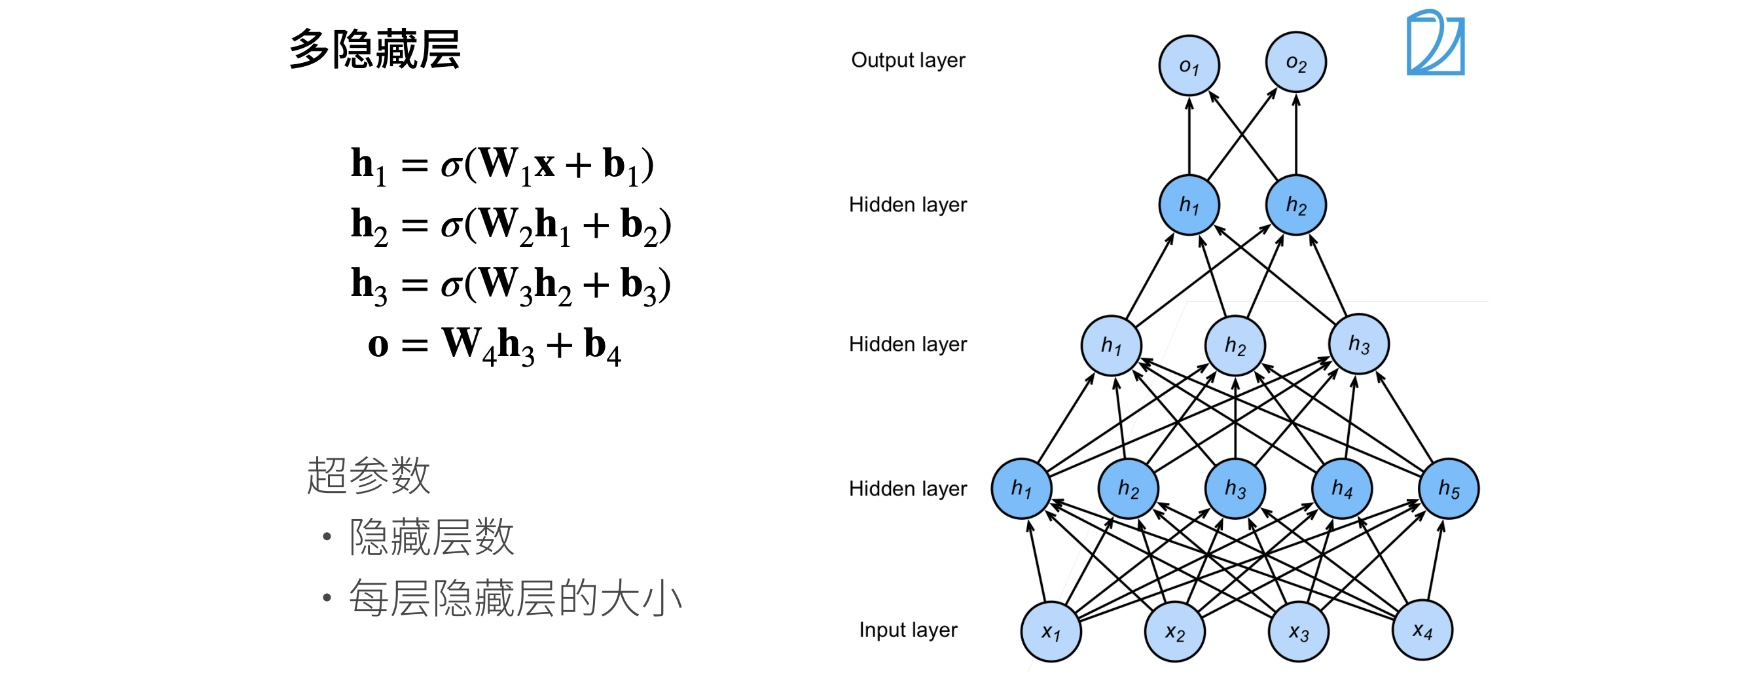

### **Activation function**

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

**ReLU**

不用做指数运算，比较快。

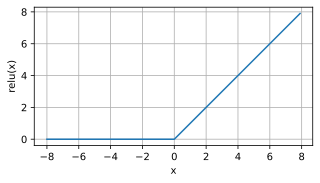

In [3]:
#ReLU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

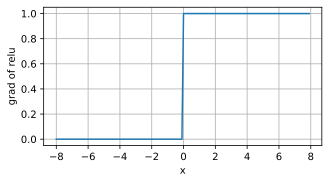

In [4]:
# derivative of y
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

**Sigmoid**

$$
sigmoid(x) = \frac{1}{1+ exp(-x)}
$$

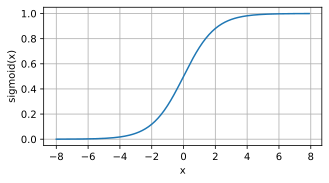

In [5]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5,2.5))

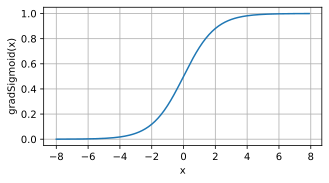

In [6]:
# grad
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), y.detach(), 'x', 'gradSigmoid(x)', figsize = (5,2.5))

**tanh**
$$
tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)}
$$

和Sigmoid类似，但是y的范围控制在-1和1之间

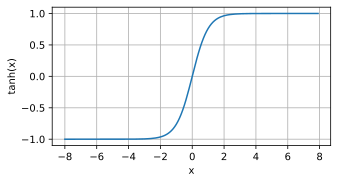

In [7]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

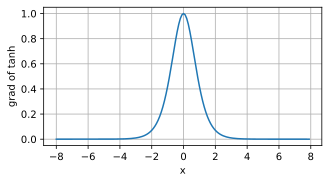

In [8]:
# grad
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### **手动单隐藏层多层感知机（MLP）**

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100%|██████████| 26421880/26421880 [00:02<00:00, 11890492.22it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 198566.16it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3731732.58it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3333684.88it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
# def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
#   """Train a model,把次數整合進去+畫圖"""
#   animator = Animator(xlabel = 'epoch', xlim = [1, num_epochs], ylim=[0.3, 0.9],
#                       legend=['train loss', 'train acc', 'test acc'])
#   for epoch in range(num_epochs):
#     train_metrics = train_epoch_ch3(net, train_iter, loss, updater)  # 返回训练损失和训练精度
#     test_acc = evaluate_accuracy(net, test_iter)
#     animator.add(epoch + 1, train_metrics + (test_acc,))
#   train_loss, train_acc = train_metrics

In [11]:
# Initialize parameters
num_inputs, num_outputs, num_hiddens = 784, 10, 256 #784=28*28, 10 classes,256\in[10,784]

# 1st
W1 = nn.Parameter( #dim- input*hidden
    torch.randn(num_inputs, num_hiddens, requires_grad=True)
)
b1 = nn.Parameter( #dim- hiddens*1, broadcast
    (torch.zeros(num_hiddens, requires_grad=True))
)

#output layer
W2 = nn.Parameter( #dim- hidden*out
    torch.randn(num_hiddens, num_outputs, requires_grad=True)
)
b2 = nn.Parameter( #dim- outs*1, broadcast
    (torch.zeros(num_outputs, requires_grad=True))
)

#set
params = [W1, W2, b1, b2]

In [12]:
# ReLU
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(a, X)

In [13]:
# modelling
def net(X):
  X = X.reshape((-1, num_inputs)) #set X to be a row vector to reduce a transpose step
  H = relu(X @ W1 +b1)
  return (H @ W2 +b2)

In [14]:
# loss function
loss = nn.CrossEntropyLoss()

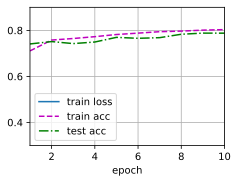

In [15]:
# training
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

loss比softmax好一点点

### **nn框架实现**

In [16]:
# modelling
net = nn.Sequential(
    nn.Flatten(), nn.Linear(784,256), nn.ReLU(), nn.Linear(256,10)
)

注意，Flatten Linear第一个字母大写

In [17]:
# intialize weights and bias
def init_weights(m): #each layer
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

In [18]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

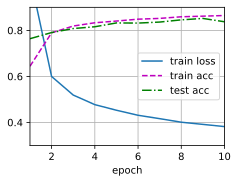

In [19]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# **正则化和Drop out**

Examples of overfitting and underfitting

**polynomial**
$$
y = 5+1.2x-3.4 \frac{x^2}{2!}+5.6 \frac{x^3}{3!} + ɛ
$$
Where $ɛ \sim N(0, 0.01)$

**Generate Samples**

In [30]:
import numpy as np
import math

# Initial
max_degree = 20
n_train, n_test = 100, 100 #其实这里的test指的是validation set, 100 is number of ...
true_w = np.zeros(max_degree) # allocate the space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6]) #前面四个系数先填上

In [31]:
features = np.random.normal(size = (n_train+n_test, 1)) # n_total * 1
np.random.shuffle(features) # training set 还是打乱下
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))
# poly_features.shape
for i in range(max_degree):
  poly_features[:, i] /= math.gamma(i+1) #gamma(n)=(n-1)!

labels = np.dot(poly_features, true_w) # w^T x
labels += np.random.normal(scale=0.1, size=labels.shape) #y =  w^Tx + e

In [ ]:
# Remark: np中power是行向量可以直接对应元素做power，
# 如果列向量的power是行向量，就广播成矩阵
import numpy as np
# 对应
p = np.arange(1,5.0)
ar = 2*np.ones(4)
# 广播
q = np.arange(1,5.0).reshape(-1,1)

p, ar, np.power(p, ar), q, ar, np.power(q, ar)

In [33]:
# trans type
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype = torch.float32) for x in [true_w, features, poly_features, labels]
]

#test
features[:2], poly_features[:2, :], labels[:2]

<ipython-input-33-f8fcde33cd0e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x, dtype = torch.float32) for x in [true_w, features, poly_features, labels]


(tensor([[0.9822],
         [0.7527]]),
 tensor([[1.0000e+00, 9.8217e-01, 4.8233e-01, 1.5791e-01, 3.8773e-02, 7.6164e-03,
          1.2468e-03, 1.7493e-04, 2.1477e-05, 2.3438e-06, 2.3020e-07, 2.0554e-08,
          1.6823e-09, 1.2710e-10, 8.9166e-12, 5.8384e-13, 3.5839e-14, 2.0706e-15,
          1.1298e-16, 5.8404e-18],
         [1.0000e+00, 7.5274e-01, 2.8331e-01, 7.1085e-02, 1.3377e-02, 2.0139e-03,
          2.5265e-04, 2.7169e-05, 2.5564e-06, 2.1381e-07, 1.6094e-08, 1.1013e-09,
          6.9084e-11, 4.0001e-12, 2.1508e-13, 1.0793e-14, 5.0777e-16, 2.2483e-17,
          9.4022e-19, 3.7249e-20]]),
 tensor([5.4427, 5.4115]))

**Training and Testing**

In [47]:
# loss
def evaluate_loss(net, data_iter, loss):
  """评估给定数据集上模型的损失"""
  metric = d2l.Accumulator(2) # (sum of loss, sample size) -> a/b mean loss
  for X, y in data_iter:
    out = net(X) #y_hat
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0]/metric[1]

In [ ]:
# train function
def train(train_features, test_features, train_labels, test_labels, num_epochs=60):
  loss = nn.MSELoss(reduce='none')
  input_shape = train_features.shape[-1]
  net = nn.Sequtial()

tensor(1.1087)


## **Regularization**

In [23]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [24]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

**$L_2$ norm**

In [25]:
# Initialize parameters

In [ ]:
# Define l2 penalty
def l2_penalty(w):


## **Dropout**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X,)

# **梯度爆炸和梯度消失**